JAIRO

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Datos
# ==============================================================================
datos = pd.read_csv("uac_limpio.csv")
#datos.head(10)
datos

,ESCUELA,SEDE,EDAD,PROMEDIO,EXCELENCIA,SEXO,EST_CIVIL,HIJOS,TRABAJA_ESTUDIA,VIVE_SOLO,NIVEL_SOCIO_ECON,SEMESTRE
0,ADMINISTRACIÓN,CUSCO,20,16.466,0,1,0,0,0,0,2,4
1,ADMINISTRACIÓN,QUILLABAMBA,27,19.103,1,0,0,0,1,0,2,5
2,ADMINISTRACIÓN,CUSCO,22,14.318,0,0,0,0,1,1,1,10
3,ADMINISTRACIÓN,QUILLABAMBA,27,14.088,0,1,2,1,1,1,2,7
4,ADMINISTRACIÓN,QUILLABAMBA,31,15.463,0,0,0,0,1,1,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...
8851,TECNOLOGÍA MÉDICA,CUSCO,33,19.239,1,0,0,0,1,1,2,6
8852,TECNOLOGÍA MÉDICA,CUSCO,19,12.863,0,0,1,0,1,0,2,5
8853,TECNOLOGÍA MÉDICA,CUSCO,24,16.760,0,1,0,0,0,0,1,5
8854,TECNOLOGÍA MÉDICA,CUSCO,25,18.999,1,1,0,0,0,1,0,5


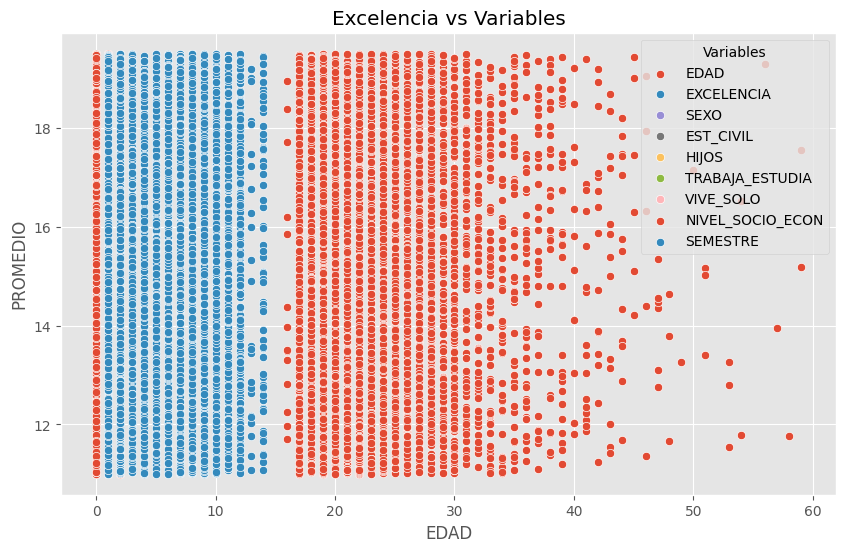

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Variables que se van a usar para el eje X (todas menos "EXCELENCIA")
x_variables = [col for col in datos.columns if col not in ['PROMEDIO', 'ESCUELA', 'SEDE']]

# Graficar todas las variables en un solo gráfico con colores diferentes
plt.figure(figsize=(10, 6))

for var in x_variables:
    sb.scatterplot(x=datos[var], y=datos["PROMEDIO"], label=var)

# Título y leyenda
plt.title('Excelencia vs Variables')
plt.legend(title='Variables')
plt.show()

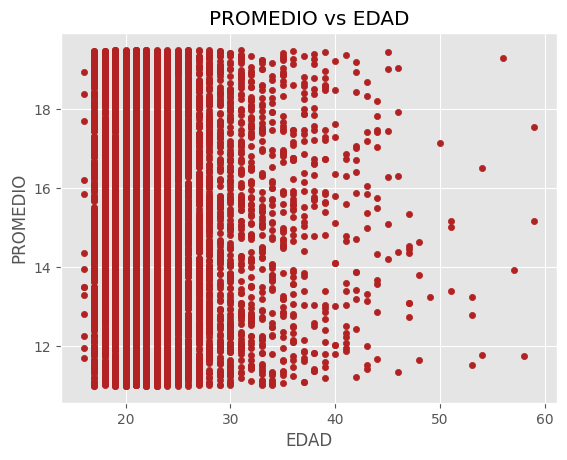

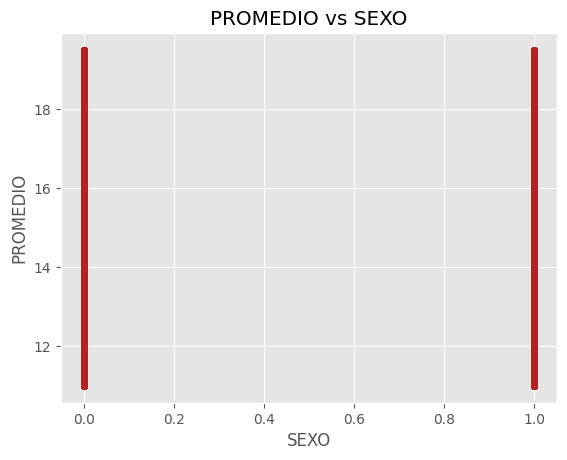

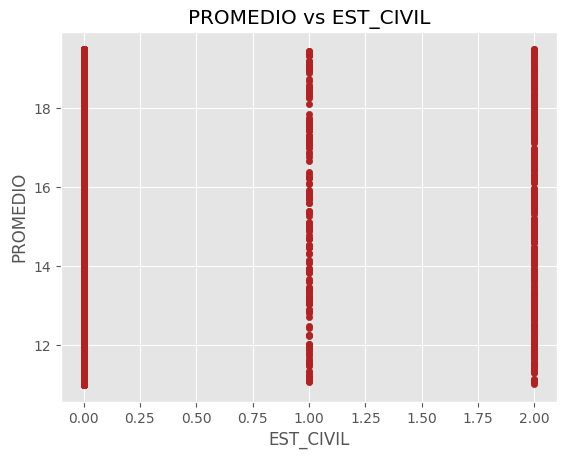

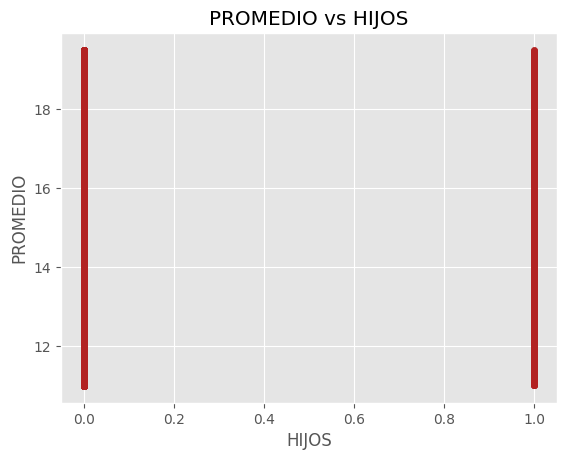

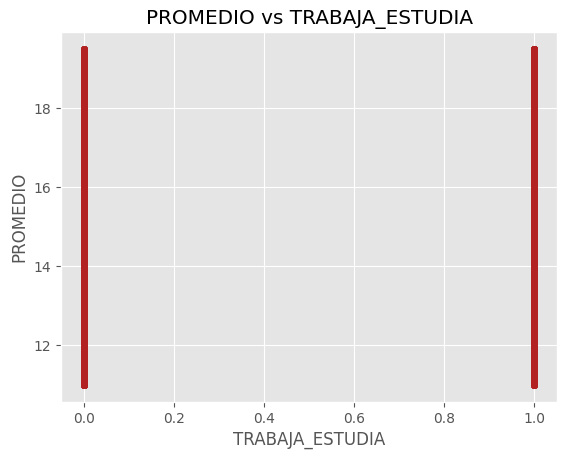

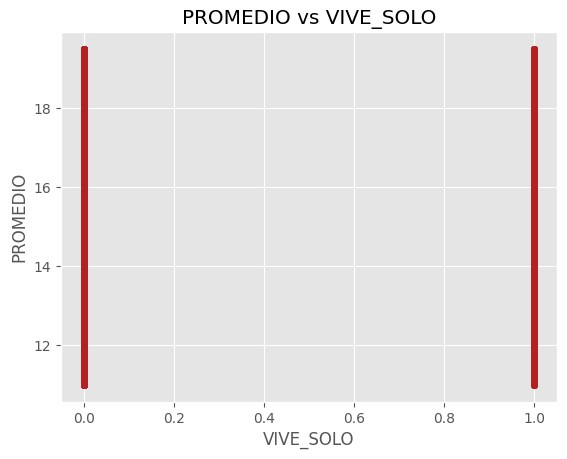

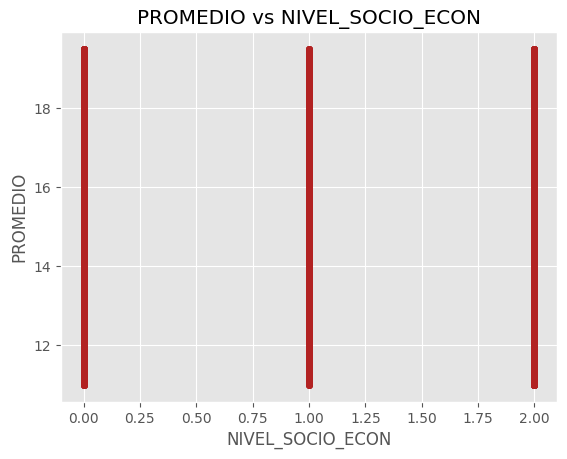

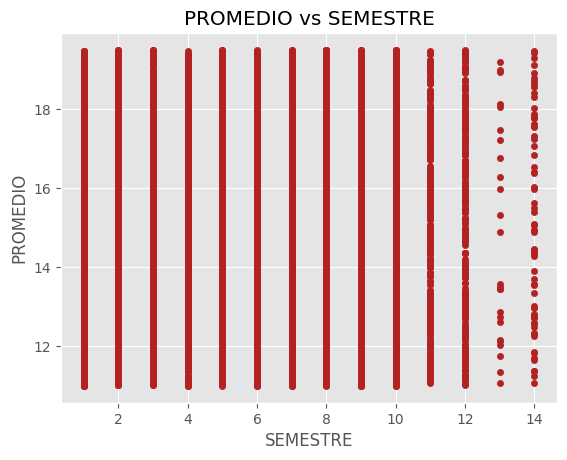

In [ ]:
x_variables = ['EDAD', 'SEXO', 'EST_CIVIL', 'HIJOS',
               'TRABAJA_ESTUDIA', 'VIVE_SOLO', 'NIVEL_SOCIO_ECON', 'SEMESTRE']

for var in x_variables:
    fig, ax = plt.subplots()

    # Graficar
    datos.plot(
        x=var,
        y='PROMEDIO',
        c='firebrick',
        kind="scatter",
        ax=ax
    )

    # Título del gráfico
    ax.set_title(f'PROMEDIO vs {var}')

    # Mostrar el gráfico
    plt.show()

In [ ]:
from scipy.stats import pearsonr

# Lista de variables con las que calcular la correlación
x_variables = ['EDAD', 'SEXO', 'EST_CIVIL', 'HIJOS',
               'TRABAJA_ESTUDIA', 'VIVE_SOLO', 'NIVEL_SOCIO_ECON', 'SEMESTRE']

# Calcular y mostrar la correlación entre 'PROMEDIO' y cada variable en x_variables
for var in x_variables:
    corr_test = pearsonr(datos['PROMEDIO'], datos[var])
    print(f"Correlación entre PROMEDIO y {var}:")
    print("Coeficiente de correlación de Pearson: ", corr_test[0])
    print("P-value: ", corr_test[1])
    print()

Correlación entre PROMEDIO y EDAD:
Coeficiente de correlación de Pearson:  -0.009667799398189743
P-value:  0.36298397033254676

Correlación entre PROMEDIO y SEXO:
Coeficiente de correlación de Pearson:  0.010018687709364147
P-value:  0.3458280128841417

Correlación entre PROMEDIO y EST_CIVIL:
Coeficiente de correlación de Pearson:  0.012566059550375364
P-value:  0.23703694430323938

Correlación entre PROMEDIO y HIJOS:
Coeficiente de correlación de Pearson:  -0.00628850790749155
P-value:  0.5540443498928727

Correlación entre PROMEDIO y TRABAJA_ESTUDIA:
Coeficiente de correlación de Pearson:  0.005554811171005425
P-value:  0.60120176308399

Correlación entre PROMEDIO y VIVE_SOLO:
Coeficiente de correlación de Pearson:  0.0006133639588952668
P-value:  0.9539770118994536

Correlación entre PROMEDIO y NIVEL_SOCIO_ECON:
Coeficiente de correlación de Pearson:  0.013607036913399472
P-value:  0.20040915968502407

Correlación entre PROMEDIO y SEMESTRE:
Coeficiente de correlación de Pearson:  -0

In [ ]:
x_variables = ['EDAD', 'SEXO', 'EST_CIVIL', 'HIJOS',
               'TRABAJA_ESTUDIA', 'VIVE_SOLO', 'NIVEL_SOCIO_ECON', 'SEMESTRE']

# División de los datos en variables independientes (X) y dependientes (y)
X = datos[x_variables]
y = datos['PROMEDIO']


# División de los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X,  # Usamos X directamente, no es necesario reshape aquí
    y,
    train_size=0.8,
    random_state=42,
    shuffle=True
)

# Creación del modelo
modelo = LinearRegression()

# Entrenamiento del modelo
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Información del modelo
# ==============================================================================

# Intercepto del modelo
print("Intercepto:", modelo.intercept_)

# Coeficientes del modelo
coeficientes = list(zip(X.columns, modelo.coef_.flatten()))
print("Coeficientes:")
for col, coef in coeficientes:
    print(f"{col}: {coef}")

# Coeficiente de determinación R^2 en el conjunto de entrenamiento
print("Coeficiente de determinación R^2 (entrenamiento):", modelo.score(X_train, y_train))

# Coeficiente de determinación R^2 en el conjunto de prueba (opcional)
print("Coeficiente de determinación R^2 (prueba):", modelo.score(X_test, y_test))

Intercepto: 15.387154193202703
Coeficientes:
EDAD: -0.008475253928521751
SEXO: 0.04546680700307475
EST_CIVIL: 0.15441550014643027
HIJOS: -0.0740271723932833
TRABAJA_ESTUDIA: 0.015463993505015441
VIVE_SOLO: 0.006030474236617908
NIVEL_SOCIO_ECON: 0.03119204487724764
SEMESTRE: -0.005123991917329408
Coeficiente de determinación R^2 (entrenamiento): 0.0010299468407157786
Coeficiente de determinación R^2 (prueba): -0.0008468300336592627


Una vez entrenado el modelo, se evalúa la capacidad predictiva empleando el conjunto de test.

In [ ]:
# Calcular predicciones en el conjunto de prueba
predicciones = modelo.predict(X_test)

# Imprimir los datos y las predicciones para verificación
print("Datos de prueba (X_test):")
print(X_test)
print("\nValores reales (y_test):")
print(y_test)
print("\nPredicciones del modelo:")
print(predicciones)

# Calcular el error cuadrático medio (RMSE)
rmse = mean_squared_error(
    y_true=y_test,
    y_pred=predicciones,
    squared=False
)

print(f"\nEl error (RMSE) de test es: {rmse}")

Datos de prueba (X_test):
      EDAD  SEXO  EST_CIVIL  HIJOS  TRABAJA_ESTUDIA  VIVE_SOLO  \
3346    21     1          0      0                1          1   
5168    22     0          0      0                1          1   
5634    27     0          2      1                1          0   
7885    24     1          2      0                1          0   
8289    21     0          0      0                1          0   
...    ...   ...        ...    ...              ...        ...   
6820    20     1          0      0                0          0   
5316    18     1          0      1                1          1   
6699    24     0          0      0                1          1   
747     21     1          0      0                1          1   
2859    25     1          0      1                1          0   

      NIVEL_SOCIO_ECON  SEMESTRE  
3346                 2         9  
5168                 2         8  
5634                 0         6  
7885                 2         3  
8289  

Índice de datos:
[   1    2    3 ... 7082 7083 7084]

Residuos:
2275    2.384599
2465   -1.262670
8062   -1.303051
6014   -2.283612
2860    2.502776
          ...   
5734   -0.821947
5191   -1.888934
5390    1.020322
860    -2.612107
7270   -3.835626
Name: PROMEDIO, Length: 7084, dtype: float64


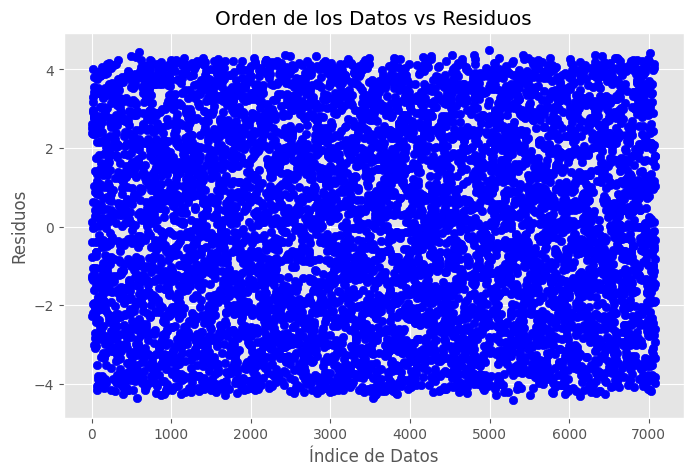

In [ ]:
# Calcular las estimaciones (predicciones) en el conjunto de entrenamiento
estimaciones = modelo.predict(X_train)

# Calcular los residuos
residuales = y_train - estimaciones

# Crear un índice para los datos
x = np.arange(1, residuales.size + 1)

# Imprimir el índice y los residuos para verificación
print("Índice de datos:")
print(x)
print("\nResiduos:")
print(residuales)

# Crear el gráfico de residuos
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(x, residuales, marker='o', color='blue')
ax.set_title('Orden de los Datos vs Residuos')
ax.set_xlabel('Índice de Datos')
ax.set_ylabel('Residuos')

# Mostrar el gráfico
plt.show()

Statsmodels

La implementación de regresión lineal de Statsmodels, es más completa que la de Scikitlearn ya que, además de ajustar el modelo, permite calcular los test estadísticos y análisis necesarios para verificar que se cumplen las condiciones sobre las que se basa este tipo de modelos. Statsmodels tiene dos formas de entrenar el modelo:

Indicando la fórmula del modelo y pasando los datos de entrenamiento como un dataframe que incluye la variable respuesta y los predictores. Esta forma es similar a la utilizada en R.

Pasar dos matrices, una con los predictores y otra con la variable respuesta. Esta es igual a la empleada por Scikitlearn con la diferencia de que a la matriz de predictores hay que añadirle una primera columna de 1s.

In [ ]:
# Crear el DataFrame de entrenamiento con todas las variables independientes y la dependiente
datos_train = pd.DataFrame(np.hstack((X_train, y_train.values.reshape(-1, 1))), columns=x_variables + ['PROMEDIO'])

# Crear y ajustar el modelo de regresión
formula = 'PROMEDIO ~ ' + ' + '.join(x_variables)
modelo = smf.ols(formula=formula, data=datos_train)
modelo = modelo.fit()

# Imprimir el resumen del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:               PROMEDIO   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9118
Date:                Mon, 16 Sep 2024   Prob (F-statistic):              0.505
Time:                        17:15:20   Log-Likelihood:                -16442.
No. Observations:                7084   AIC:                         3.290e+04
Df Residuals:                    7075   BIC:                         3.296e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           15.3872      0.172  

In [ ]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:               PROMEDIO   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9118
Date:                Mon, 16 Sep 2024   Prob (F-statistic):              0.505
Time:                        17:13:44   Log-Likelihood:                -16442.
No. Observations:                7084   AIC:                         3.290e+04
Df Residuals:                    7075   BIC:                         3.296e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               15.3872      0.172  

In [ ]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================

# Calcular los intervalos de confianza para los coeficientes del modelo
intervalos_confianza = modelo.conf_int(alpha=0.05)

# Imprimir los intervalos de confianza
print("Intervalos de confianza para los coeficientes (95%):")
print(intervalos_confianza)

Intervalos de confianza para los coeficientes (95%):
                          0          1
Intercept         15.050209  15.724100
EDAD              -0.024062   0.007112
SEXO              -0.071487   0.162421
EST_CIVIL          0.003571   0.305260
HIJOS             -0.312989   0.164934
TRABAJA_ESTUDIA   -0.114559   0.145487
VIVE_SOLO         -0.120120   0.132181
NIVEL_SOCIO_ECON  -0.039403   0.101787
SEMESTRE          -0.025284   0.015037


In [ ]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================

# Obtener las predicciones y los intervalos de confianza del 95%
predicciones = modelo.get_prediction(exog=sm.add_constant(X_train)).summary_frame(alpha=0.05)

# Mostrar las primeras 4 filas de las predicciones con intervalos de confianza
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,15.203401,0.078607,15.049308,15.357494,10.366530,20.040272
1,15.193670,0.071132,15.054230,15.333109,10.357244,20.030096
2,15.410051,0.101170,15.211729,15.608374,10.571569,20.248533
3,15.281612,0.077554,15.129583,15.433640,10.444806,20.118417


         x       y
2173  16.0  14.091
6262  16.0  13.338
5177  16.0  11.845
5121  16.0  17.921
6252  16.0  11.235


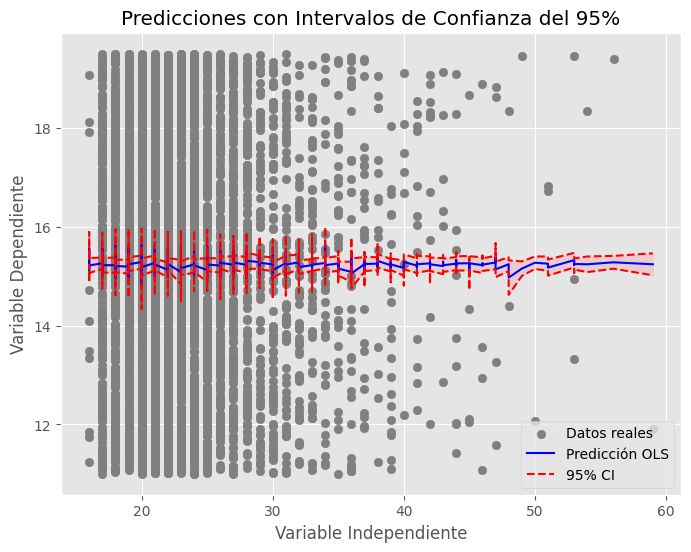

In [ ]:
# Obtener predicciones con intervalo de confianza del 95%
predicciones = modelo.get_prediction(exog=sm.add_constant(X_train)).summary_frame(alpha=0.05)

# Agregar las variables originales a las predicciones
predicciones['x'] = X_train[x_variables[0]]  # Usamos la primera columna de X_train para 'x'
predicciones['y'] = y_train.values  # Convertir y_train a array si es una Serie

# Ordenar por la variable 'x' para una visualización adecuada
predicciones = predicciones.sort_values('x')

# Mostrar las primeras filas de las predicciones para verificación
print(predicciones[['x', 'y']].head())

# Crear el gráfico del modelo
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar los puntos reales
ax.scatter(predicciones['x'], predicciones['y'], marker='o', color='gray', label='Datos reales')

# Graficar la línea de predicción
ax.plot(predicciones['x'], predicciones['mean'], linestyle='-', color='blue', label='Predicción OLS')

# Graficar los intervalos de confianza del 95%
ax.plot(predicciones['x'], predicciones['mean_ci_lower'], linestyle='--', color='red', label='95% CI')
ax.plot(predicciones['x'], predicciones['mean_ci_upper'], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones['mean_ci_lower'], predicciones['mean_ci_upper'], color='red', alpha=0.1)

# Configurar el gráfico
ax.set_title('Predicciones con Intervalos de Confianza del 95%')
ax.set_xlabel('Variable Independiente')
ax.set_ylabel('Variable Dependiente')
ax.legend()

In [ ]:
# Error de test del modelo
# ==============================================================================
# Añadir una columna de 1s a X_test para el intercepto del modelo
X_test_const = sm.add_constant(X_test, prepend=True)

# Realizar predicciones en el conjunto de prueba
predicciones = modelo.predict(exog=X_test_const)

# Calcular el error RMSE
rmse = mean_squared_error(
    y_true=y_test,
    y_pred=predicciones,
    squared=False  # Esto devuelve la raíz cuadrada del MSE
)

# Imprimir el RMSE
print("")
print(f"El error (RMSE) de test es: {rmse}")


El error (RMSE) de test es: 2.4490689423356318


In [ ]:
X_test

,EDAD,SEXO,EST_CIVIL,HIJOS,TRABAJA_ESTUDIA,VIVE_SOLO,NIVEL_SOCIO_ECON,SEMESTRE
3346,21,1,0,0,1,1,2,9
5168,22,0,0,0,1,1,2,8
5634,27,0,2,1,1,0,0,6
7885,24,1,2,0,1,0,2,3
8289,21,0,0,0,1,0,2,3
...,...,...,...,...,...,...,...,...
6820,20,1,0,0,0,0,2,6
5316,18,1,0,1,1,1,1,12
6699,24,0,0,0,1,1,0,9
747,21,1,0,0,1,1,0,8


In [ ]:
y_test

,PROMEDIO
3346,14.180
5168,11.928
5634,17.290
7885,12.711
8289,16.575
...,...
6820,12.924
5316,17.629
6699,16.231
747,12.806


In [ ]:
X_train.head()

,EDAD,SEXO,EST_CIVIL,HIJOS,TRABAJA_ESTUDIA,VIVE_SOLO,NIVEL_SOCIO_ECON,SEMESTRE
2275,21,1,0,0,0,0,0,10
2465,23,0,0,0,1,1,1,10
8062,18,0,1,0,1,0,1,5
6014,18,0,0,0,0,0,2,3
2860,24,0,0,0,1,0,2,3


In [ ]:
pred = modelo.predict(X_test.iloc[[2]])
if pred.iloc[0] >=17:
  print("Excelencia")
else:
  print("No Excelencia")

No Excelencia


In [ ]:
resultados= []
for i in range(100):
  pred = modelo.predict(X_test.iloc[[i]])
  if pred.iloc[0] >=17:
    resultados.append("EXCELENTE")
    indice = i
    #print(i)
  else:
    resultados.append("No Excelencia")
print(resultados)

['No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelencia', 'No Excelenci